## ***DISTRIBUCIONES DE PROBABILIDAD***

>*Las variables aleatorias han llegado a desempeñar un papel importante en casi todos los campos de estudio: en la Física, la Química y la Ingeniería; y especialmente en las ciencias biológicas y sociales. Estas variables aleatorias son medidas y analizadas en términos de sus propiedades estadísticas y probabilísticas, de las cuales una característica subyacente es su función de distribución.* 

### ***¿Por qué es importante conocer las distribuciones?***

>**Muchos resultados en las ciencias se basan en conclusiones que se extraen sobre una población general a partir del estudio de una muestra de esta población. Este proceso se conoce como inferencia estadística; y este tipo de inferencia con frecuencia se basa en hacer suposiciones acerca de la forma en que los datos se distribuyen, o requiere realizar alguna transformación de los datos para que se ajusten mejor a alguna de las distribuciones conocidas y estudiadas en profundidad.**

>*Las distribuciones de probabilidad teóricas son útiles en la inferencia estadística porque sus propiedades y características son conocidas. Si la distribución real de un conjunto de datos dado es razonablemente cercana a la de una distribución de probabilidad teórica, muchos de los cálculos se pueden realizar en los datos reales utilizando hipótesis extraídas de la distribución teórica.*

***Histogramas***
>Una de las mejores maneras de describir una variable es representar los valores que aparecen en el conjunto de datos y el número de veces que aparece cada valor. La representación más común de una distribución es un histograma, que es un gráfico que muestra la frecuencia de cada valor.

In [3]:
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

np.random.seed(2016) # replicar random

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

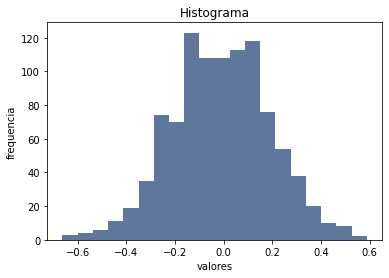

In [4]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

***Función de Masa de Probabilidad***
>Otra forma de representar a las distribuciones discretas es utilizando su Función de Masa de Probabilidad o FMP, la cual relaciona cada valor con su probabilidad en lugar de su frecuencia como vimos anteriormente. Esta función es normalizada de forma tal que el valor total de probabilidad sea 1. La ventaja que nos ofrece utilizar la FMP es que podemos comparar dos distribuciones sin necesidad de ser confundidos por las diferencias en el tamaño de las muestras. 

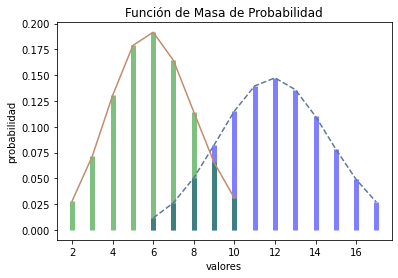

In [4]:
# Graficando FMP
n, p = 30, 0.4 # parametros de forma de la distribución binomial
n_1, p_1 = 20, 0.3 # parametros de forma de la distribución binomial
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

***Función de Distribución Acumulada***
>Si queremos evitar los problemas que se generan con FMP cuando el número de valores es muy grande, podemos recurrir a utilizar la Función de Distribución Acumulada o FDA, para representar a nuestras distribuciones, tanto discretas como continuas. Esta función relaciona los valores con su correspondiente percentil; es decir que va a describir la probabilidad de que una variable aleatoria X sujeta a cierta ley de distribución de probabilidad se sitúe en la zona de valores menores o iguales a x.

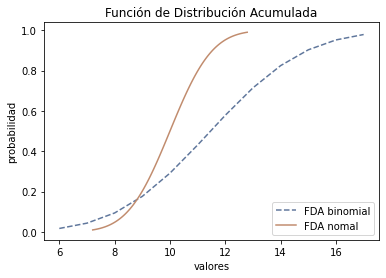

In [10]:
# Graficando Función de Distribución Acumulada con Python
x_1 = np.linspace(stats.norm(10, 1.2).ppf(0.01),
                  stats.norm(10, 1.2).ppf(0.99), 100)
fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_normal = stats.norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada
plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.plot(x_1, fda_normal, label='FDA nomal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

***Función de Densidad de Probabilidad***
>Por último, el equivalente a la FMP para distribuciones continuas es la Función de Densidad de Probabilidad o FDP. Esta función es la derivada de la Función de Distribución Acumulada. Por ejemplo, para la distribución normal que graficamos anteriormente, su FDP es la siguiente. La típica forma de campana que caracteriza a esta distribución.

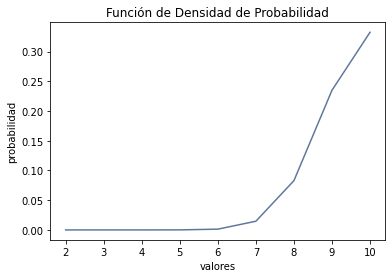

In [6]:
# Graficando Función de Densidad de Probibilidad con Python
FDP_normal = stats.norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# ***Distribuciones***
>*Ahora que ya conocemos como podemos hacer para representar a las distribuciones; pasemos a analizar cada una de ellas en más detalle para conocer su forma, sus principales aplicaciones y sus propiedades. Comencemos por las distribuciones discretas.*

***Distribuciones Discretas***
>Las distribuciones discretas son aquellas en las que la variable puede tomar solo algunos valores determinados. Los principales exponentes de este grupo son las siguientes:

***Distribución Poisson***
>La Distribución Poisson esta dada por la formula:

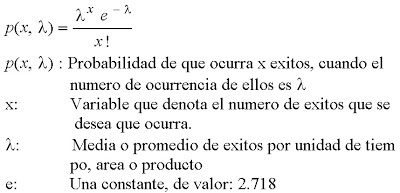

>En dónde r es un entero (r≥0) y μ es un número real positivo. La Distribución Poisson describe la probabilidad de encontrar exactamente r eventos en un lapso de tiempo si los acontecimientos se producen de forma independiente a una velocidad constante μ. Es una de las distribuciones más utilizadas en estadística con varias aplicaciones; como por ejemplo describir el número de fallos en un lote de materiales o la cantidad de llegadas por hora a un centro de servicios.

>En Python la podemos generar fácilmente con la ayuda de scipy.stats, paquete que utilizaremos para representar a todas las restantes distribuciones a lo largo de todo el artículo.

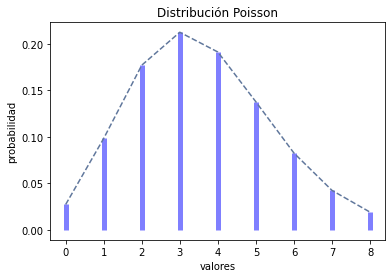

In [7]:
# Graficando Poisson
mu =  3.6 # parametro de forma 
poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


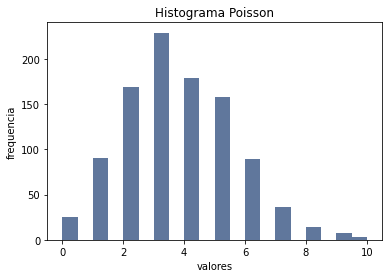

In [8]:
# histograma
aleatorios = poisson.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()

***Distribución Binomial***
>La Distribución Binomial esta dada por la formula:

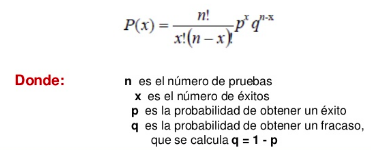

>En dónde r con la condición 0≤r≤N y el parámetro N (N>0) son enteros; y el parámetro p (0≤p≤1) es un número real. La Distribución Binomial describe la probabilidad de exactamente r éxitos en N pruebas si la probabilidad de éxito en una sola prueba es p.

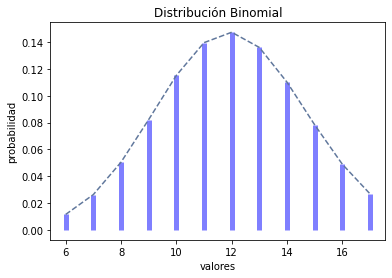

In [9]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

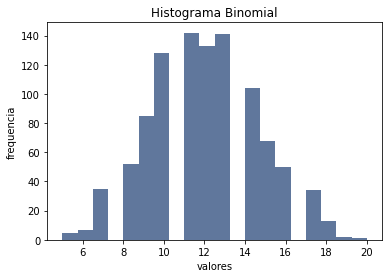

In [10]:
# histograma
aleatorios = binomial.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

***Distribución Geométrica***
>La Distribución Geométrica esta dada por la formula:

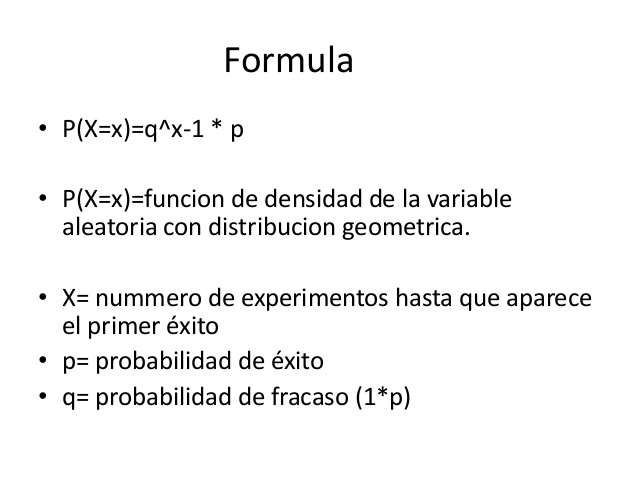

>En dónde r≥1 y el parámetro p (0≤p≤1) es un número real. La Distribución Geométrica expresa la probabilidad de tener que esperar exactamente r pruebas hasta encontrar el primer éxito si la probabilidad de éxito en una sola prueba es p. Por ejemplo, en un proceso de selección, podría definir el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

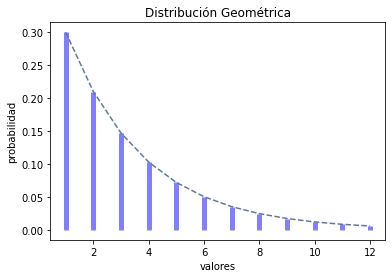

In [11]:
# Graficando Geométrica
p =  0.3 # parametro de forma 
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

***Distribución Hipergeométrica***
>La Distribución Hipergeométrica esta dada por la formula:

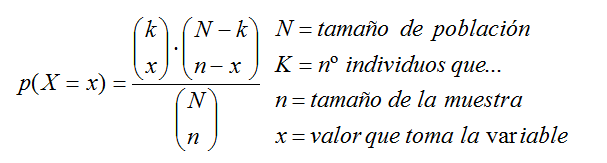

>En dónde el valor de r esta limitado por max(0,n−N+M) y min(n,M) inclusive; y los parámetros n (1≤n≤N), N (N≥1) y M (M≥1) son todos números enteros. La Distribución Hipergeométrica describe experimentos en donde se seleccionan los elementos al azar sin reemplazo (se evita seleccionar el mismo elemento más de una vez). Más precisamente, supongamos que tenemos N elementos de los cuales M tienen un cierto atributo (y N−M no tiene). Si escogemos n elementos al azar sin reemplazo, p(r) es la probabilidad de que exactamente r de los elementos seleccionados provienen del grupo con el atributo.

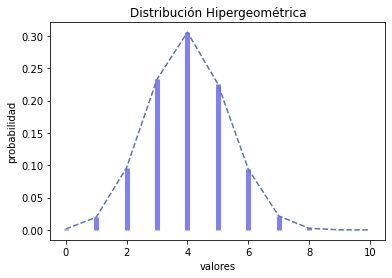

In [12]:
# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

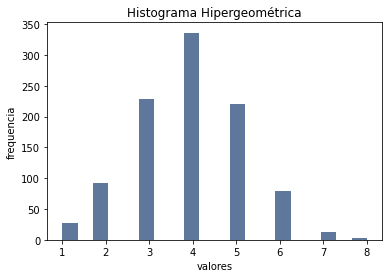

In [13]:
# histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Hipergeométrica')
plt.show()

***Distribución de Bernoulli***
>La Distribución de Bernoulli esta dada por la formula:

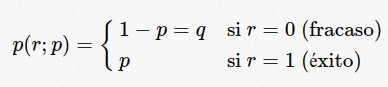

>En dónde el parámetro p es la probabilidad de éxito en un solo ensayo, la probabilidad de fracaso por lo tanto va a ser 1−p (muchas veces expresada como q). Tanto p como q van a estar limitados al intervalo de cero a uno. La Distribución de Bernoulli describe un experimento probabilístico en donde el ensayo tiene dos posibles resultados, éxito o fracaso. Desde esta distribución se pueden deducir varias Funciones de Densidad de Probabilidad de otras distribuciones que se basen en una serie de ensayos independientes.

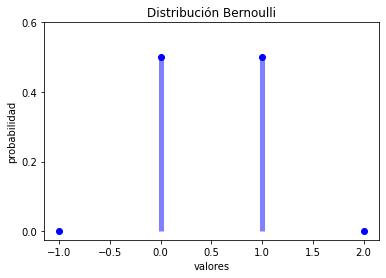

In [14]:
# Graficando Bernoulli
p =  0.5 # parametro de forma 
bernoulli = stats.bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

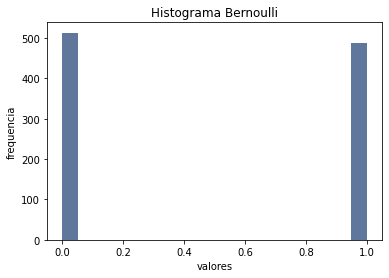

In [15]:
# histograma
aleatorios = bernoulli.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Bernoulli')
plt.show()

***Distribución de Normal***
>La Distribución Normal, o también llamada Distribución de Gauss, es aplicable a un amplio rango de problemas, lo que la convierte en la distribución más utilizada en estadística; esta dada por la formula:

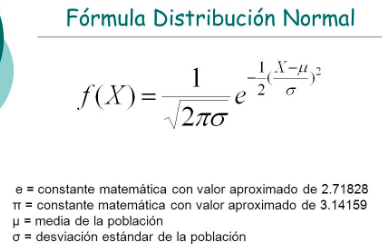

>En dónde μ es el parámetro de ubicación, y va a ser igual a la media aritmética y σ2 es el desvío estándar. Algunos ejemplos de variables asociadas a fenómenos naturales que siguen el modelo de la Distribución Normal son:

1. Características morfológicas de individuos, como la estatura
2. Características sociológicas, como el consumo de cierto producto por un mismo grupo de individuos
3. Características psicológicas, como el cociente intelectual
4. Nivel de ruido en telecomunicaciones
5. Errores cometidos al medir ciertas magnitudes, etc.

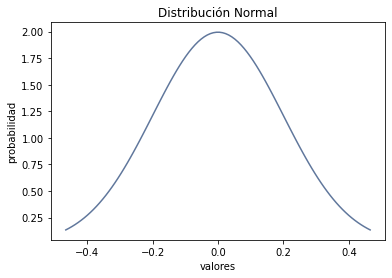

In [16]:
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

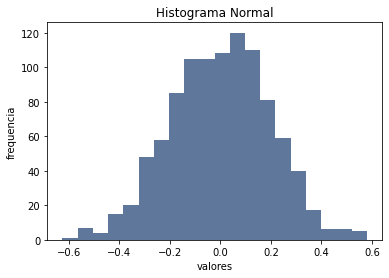

In [17]:
# histograma
aleatorios = normal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()

***Distribución Uniforme***
>La Distribución Uniforme es un caso muy simple expresada por la función:

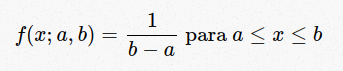

>Su función de distribución esta entonces dada por:

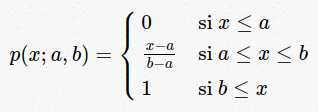

>Todos los valore tienen prácticamente la misma probabilidad.

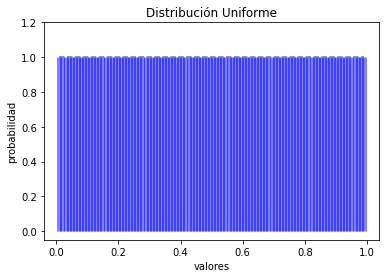

In [18]:
# Graficando Uniforme
uniforme = stats.uniform()
x = np.linspace(uniforme.ppf(0.01),
                uniforme.ppf(0.99), 100)
fp = uniforme.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fp, '--')
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

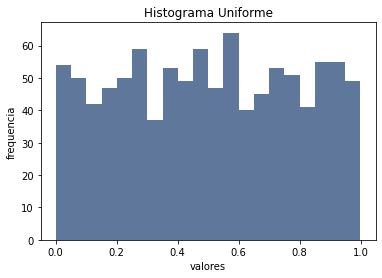

In [19]:
# histograma
aleatorios = uniforme.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Uniforme')
plt.show()

***Distribución de Log-normal***
>La Distribución Log-normal esta dada por la formula:

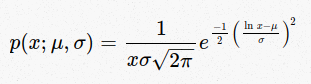

>En dónde la variable x>0 y los parámetros μ y σ>0 son todos números reales. La Distribución Log-normal es aplicable a variables aleatorias que están limitadas por cero, pero tienen pocos valores grandes. Es una distribución con asimetría positiva. Algunos de los ejemplos en que la solemos encontrar son:

1. El peso de los adultos.
2. La concentración de los minerales en depósitos.
3. Duración de licencia por enfermedad.
4. Distribución de riqueza
5. Tiempos muertos de maquinarias.

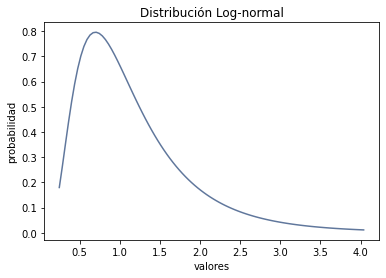

In [20]:
# Graficando Log-Normal
sigma = 0.6 # parametro
lognormal = stats.lognorm(sigma)
x = np.linspace(lognormal.ppf(0.01),
                lognormal.ppf(0.99), 100)
fp = lognormal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

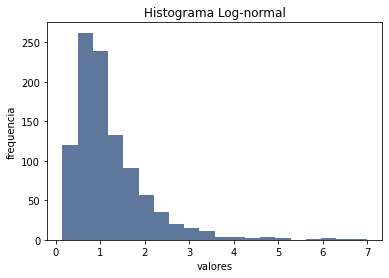

In [23]:
# histograma
aleatorios = lognormal.rvs(1000) # genera aleatorios
cuenta,cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Log-normal')
plt.show()

***Distribución de Exponencial***
>La Distribución Exponencial esta dada por la formula:

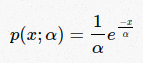

> En dónde tanto la variable x como el parámetro α son números reales positivos. La Distribución Exponencial tiene bastantes aplicaciones, tales como la desintegración de un átomo radioactivo o el tiempo entre eventos en un proceso de Poisson donde los acontecimientos suceden a una velocidad constante.

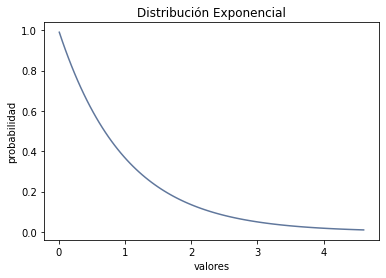

In [24]:
# Graficando Exponencial
exponencial = stats.expon()
x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)
fp = exponencial.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

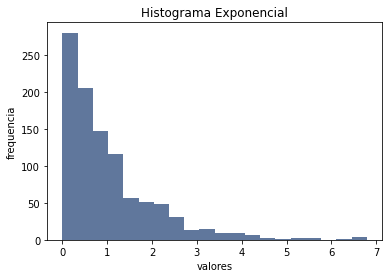

In [25]:
# histograma
aleatorios = exponencial.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.show()

***Distribución Gamma***
>La Distribución Gamma esta dada por la formula:

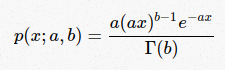

>En dónde los parámetros a y b y la variable x son números reales positivos y Γ(b) es la función gamma. La Distribución Gamma comienza en el origen de coordenadas y tiene una forma bastante flexible. Otras distribuciones son casos especiales de ella.

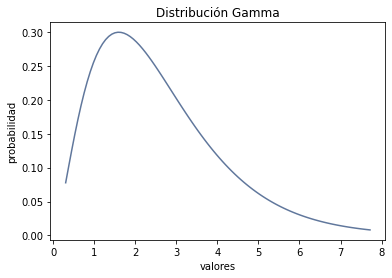

In [26]:
# Graficando Gamma
a = 2.6 # parametro de forma.
gamma = stats.gamma(a)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Gamma')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

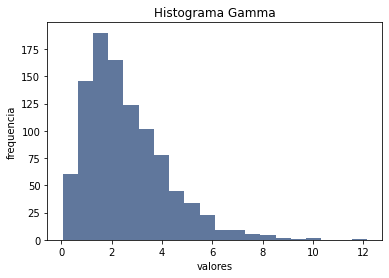

In [27]:
# histograma
aleatorios = gamma.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Gamma')
plt.show()

***Distribución Beta***
>La Distribución Beta esta dada por la formula:

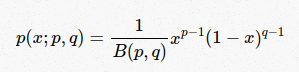

>En dónde los parámetros p y q son números reales positivos, la variable x satisface la condición 0≤x≤1 y B(p,q) es la función beta. Las aplicaciones de la Distribución Beta incluyen el modelado de variables aleatorias que tienen un rango finito de a hasta b. Un ejemplo de ello es la distribución de los tiempos de actividad en las redes de proyectos. La Distribución Beta se utiliza también con frecuencia como una probabilidad a priori para proporciones binomiales en el análisis bayesiano.

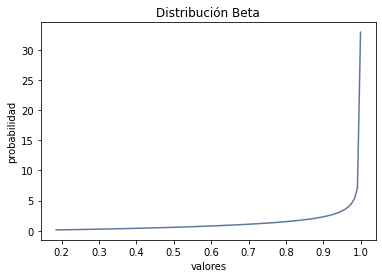

In [28]:
# Graficando Beta
a, b = 2.3, 0.6 # parametros de forma.
beta = stats.beta(a, b)
x = np.linspace(beta.ppf(0.01),
                beta.ppf(0.99), 100)
fp = beta.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Beta')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


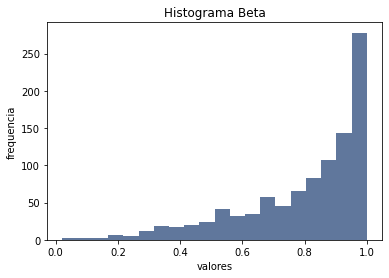

In [29]:
# histograma
aleatorios = beta.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Beta')
plt.show()


***Distribución Chi cuadrado***
>La Distribución Chi cuadrado esta dada por la función:

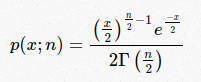

>En dónde la variable x≥0 y el parámetro n, el número de grados de libertad, es un número entero positivo. Una importante aplicación de la Distribución Chi cuadrado es que cuando un conjunto de datos es representado por un modelo teórico, esta distribución puede ser utilizada para controlar cuan bien se ajustan los valores predichos por el modelo, y los datos realmente observados.

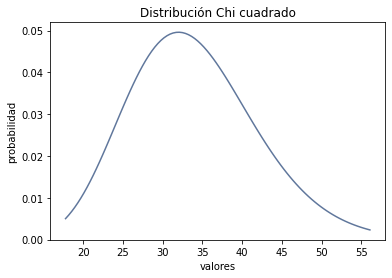

In [5]:
# Graficando Chi cuadrado
df = 34 # parametro de forma.
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

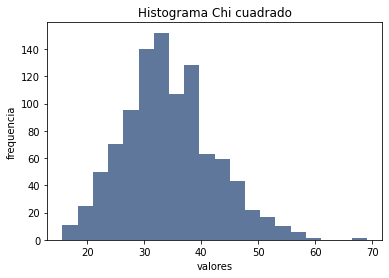

In [31]:
# histograma
aleatorios = chi2.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi cuadrado')
plt.show()

***Distribución T de Student***
>La Distribución t de Student esta dada por la función:

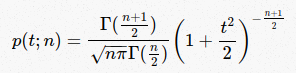

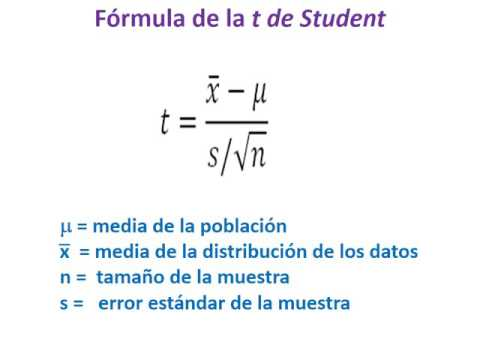

>En dónde la variable t es un número real y el parámetro n es un número entero positivo. La Distribución t de Student es utilizada para probar si la diferencia entre las medias de dos muestras de observaciones es estadísticamente significativa. Por ejemplo, las alturas de una muestra aleatoria de los jugadores de baloncesto podría compararse con las alturas de una muestra aleatoria de jugadores de fútbol; esta distribución nos podría ayudar a determinar si un grupo es significativamente más alto que el otro.

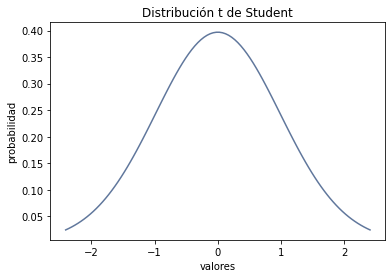

In [32]:
# Graficando t de Student
df = 50 # parametro de forma.
t = stats.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


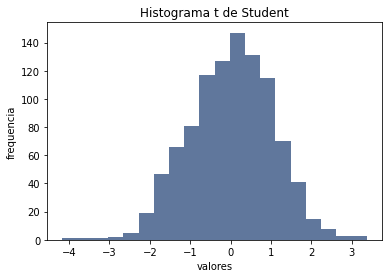

In [33]:
# histograma
aleatorios = t.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma t de Student')
plt.show()

***Distribución de Pareto***
>La Distribución de Pareto esta dada por la función:

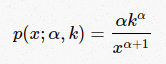

>En dónde la variable x≥k y el parámetro α>0 son números reales. Esta distribución fue introducida por su inventor, Vilfredo Pareto, con el fin de explicar la distribución de los salarios en la sociedad. La Distribución de Pareto se describe a menudo como la base de la regla 80/20. Por ejemplo, el 80% de las quejas de los clientes con respecto al funcionamiento de su vehículo por lo general surgen del 20% de los componentes.

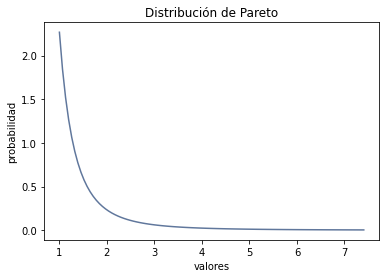

In [34]:
# Graficando Pareto
k = 2.3 # parametro de forma.
pareto = stats.pareto(k)
x = np.linspace(pareto.ppf(0.01),
                pareto.ppf(0.99), 100)
fp = pareto.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución de Pareto')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

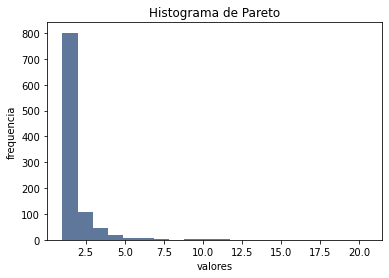

In [35]:
# histograma
aleatorios = pareto.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma de Pareto')
plt.show()

# ***¿Cómo elegir la distribución que mejor se ajusta a mis datos?***
> *Ahora ya tenemos un conocimiento general de las principales distribuciones con que nos podemos encontrar; pero ¿cómo determinamos que distribución debemos utilizar?*

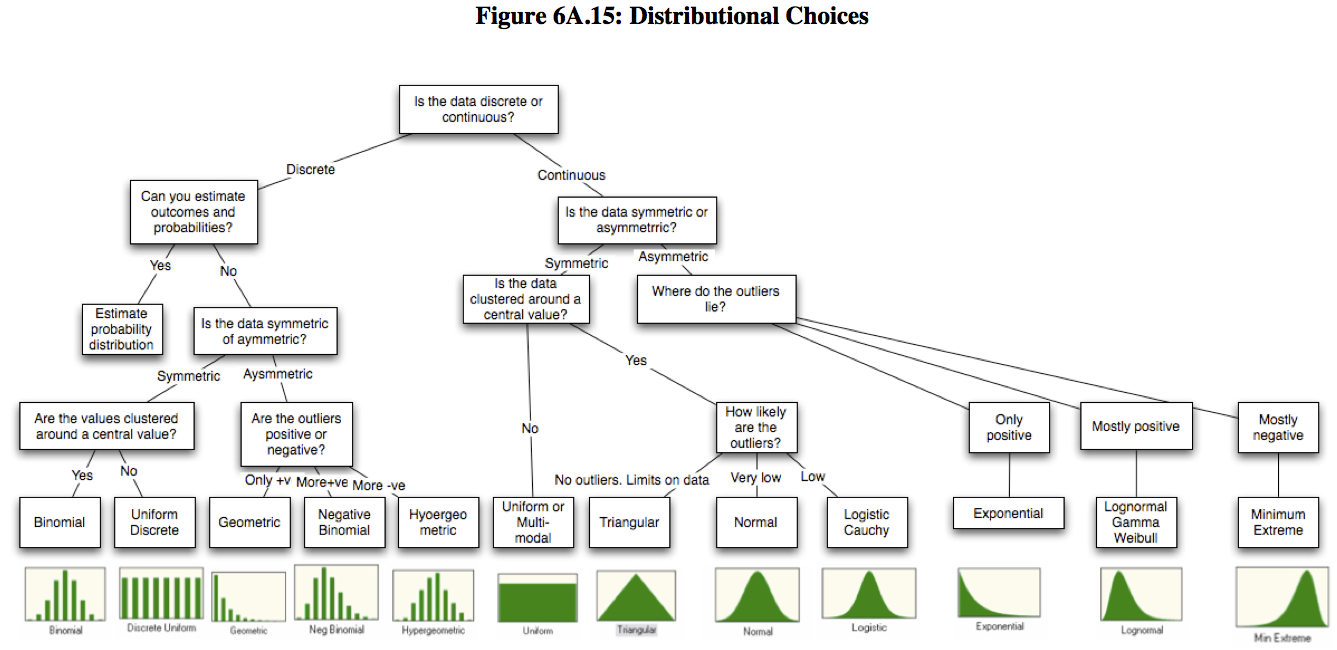

# ***EJERCICIOS:***

>***By: GRUPO NRO.2***

***Hemos hablado de las funciones de probabilidad y de densidad, sin embargo, nos falta algo muy importante. ¿Cuáles son esas funciones exactamente? Es donde entran los modelos de probabilidad, modelos estadísticos que se pueden ajustar a una variable aleatoria con mejor o peor precisión y que nos dan los valores de la probabilidad. Empecemos, pero antes hagamos un apunte sobre las equivalencias en SciPy:***

1. **cdf(x)***- Función de distribución F(X)

2. ***sf(x)*** = 1 - cdf(x)

3. ***pmf(x)*** - Función de probabilidad f(x) (distribuciones discretas)

4. ***pdf(x)*** - Función de densidad f(x) (distribuciones continuas)

5. ***ppf(x)*** - Función inversa a cdf(x). Nos permite obtener el valor correspondiente a una probabilidad.

***Distribución Binomial***
>SciPy nos permite usar *binom* para trabajar con distribuciones binomiales.

**1. Un proveedor de DVDs afirma que solamente el 4 % de los artículos suministrados son defectuosos. Si un cliente compra un lote de 25**

**DVDs, ¿cuál es el número esperado de DVDs defectuosos en el lote? Si el cliente encuentra que 4 de los DVDs comprados son defectuosos, ¿debe dudar de la afirmación del vendedor?**

*El número de DVDs defectuosos esperados es el equivalente a decir el número medio de DVDs defectuosos.*



In [6]:
import scipy.stats as ss

X = ss.binom(25,0.04)

X.mean() # 1.0

1.0

**Es decir, de media habría 1 DVD defectuoso en el paquete. mean calcula la media de la distribución.**

*Para saber si hay que fiarse del vendedor vamos a calcular cuál era la probabilidad de que nos tocasen 4 DVDs defectuosos.*

In [40]:
import scipy.stats as ss

X = ss.binom(25,0.04)

pr = X.sf(3) # 0.016521575032415914
pr.mean()

0.016521575032415876

*Es decir, la probabilidad que ocurriese era del 1%. Podemos sospechar del fabricante. cdf calcula las probabilidades acumuladas. En este caso tenemos que calcular la probabilidad de que hubiese 4 o más fallos, Pr{X>=4}. Una manera fácil de calcularlo es hacer 1-Pr{X<4}. cdf(n) nos permite calcular probabilidades acumuladas hasta N. Otra opción sería simplemente obtener la probabilidad de 0 DVDs defectuosos, 1 DVD defectuoso, de 2 DVDs defectuosos, de 3 DVDs defectuosos, sumarlo y restarlo de 1.*

In [44]:
import scipy.stats as ss

X = ss.binom(25,0.04)

pr = 1 - sum(X.pmf(x) for x in range(4))
pr.mean()

0.016521575032417912

*Podemos calcular la gráfica de esta distribución binomial*

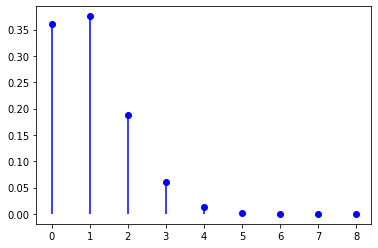

In [50]:
import scipy.stats as ss
import matplotlib.pyplot as plt

X = ss.binom(25,0.04)
x = np.arange(9)

plt.plot(x,X.pmf(x),"bo")
plt.vlines(x,0,X.pmf(x),"b")
plt.show()

>***RTA:En el gráfico también se puede ver que las probabilidades de tener 4 o más DVDs defectuosos son mínimas.***

***Distribución hipergeométrica***
>La distribución hipergeométrica es un modelo en el que se considera una población finita de tamaño N en la cual hay M individuos con una determinada característica y se seleccionan n y queremos saber la probabilidad de que haya cierto número de individuos con esa característica en la selección. Para trabajar con estas distribuciones, ***SciPy trae hypergeom.***

2. ***Se formó un jurado de 6 personas de un grupo de 20 posibles miembros de los cuales 8 eran mujeres y 12 hombres. El jurado seelecionó aleatoriamente, pero solamente tenía 1 mujer. ¿Hay motivos para dudarde la aletoriedad de la selección?***

In [46]:
import scipy.stats as ss

X = ss.hypergeom(20,6,8)

X.cdf(1) # 0.18730650154798736

0.18730650154798736

*La probabilidad de que ocurriese lo que ocurrió es del 18,7%, una probabilidad suficientemente alta como para pensar que no hubo manipulación. Podemos dibujar esta hipergeométrica:*

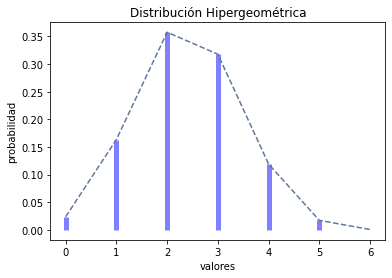

In [72]:
import scipy.stats as ss
import matplotlib.pyplot as plt
# Graficando Hipergeométrica
M, n, N = 20, 6, 8 # parametros de forma 
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

>***RTA: Como se puede observar en la gráfica el caso más probable, con cerca del 35% de posibilidades era que hubiese dos mujeres seleccionadas. Destacar también, que la probabilidad de que haya 7 mujeres en el jurado es cero, porque solo hay 6 plazas en el jurado.***

***Distribución de Poisson***

>*La distribución de Poisson recoge sucesos independientes que ocurren en un soporte continuo. El número medio de sucesos por unidad de soporte se le conoce como λ y caracteriza la distribución. ***poisson*** nos permite crear distribuciones de este tipo.*

*Algunos ejemplos de distribuciones de Poisson: número de clientes que llegan cada hora a cierto puesto de servicio, número de averías diarias de un sistema informático, número de vehículos que pasan diariamente por un túnel, número de defectos por kilómetro de cable, ...*

3. ***La impresora de una pequeña red informática recibe una media de 0.1 peticiones por segundo. Suponiendo que las peticiones a dicha impresora son independientes y a ritmo constante, ¿cuál es la probabilidad de un máximo de 2 peticiones en un segundo? Si la cola de la impresora tiene un comportamiento deficiente cuando recibe más de 10 peticiones en un minuto, ¿cuál es la probabilidad de que ocurra esto?***

In [54]:
import scipy.stats as ss

X = ss.poisson(0.1)
X.cdf(2) # 0.99984534692973537

0.9998453469297354

In [55]:
Y = ss.poisson(6)
Y.sf(10) # 0.042620923582537995

0.042620923582538

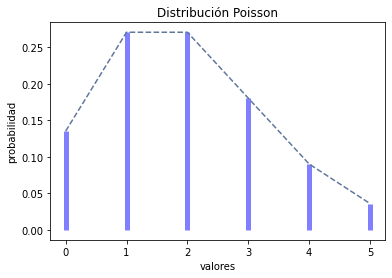

In [75]:
# Graficando Poisson
mu =  2 # parametro de forma 
poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

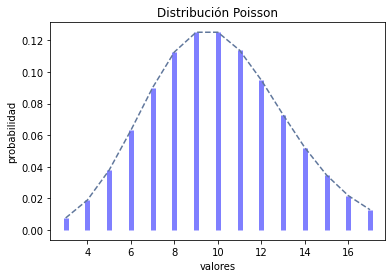

In [100]:
# Graficando Poisson
mu =  10 # parametro de forma 
poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

***Distribución exponencial***

>*Para modelizar el intervalo entre dos sucesos consecutivos que siguen una distribución de Poisson se usa la distribución exponencial de parámetro λ.*

4. ***El proceso de accesos a una página web se produce de una forma estable e independiente, siendo el intervalo entre dos accesos consecutivos una v.a. exponencial. Sabiendo que, de media, se produce un acceso cada minuto,¿cuál es la probabilidad de que no se produzcan accesos en 4 minutos?*** 

In [101]:
import scipy.stats as ss

ss.expon.sf(4,loc=0,scale=1) # 0.018315638888734179

0.01831563888873418

***NOTA:Esta distribución en SciPy es un poco rara, ya que no está implementada como podría esperarse.***

***Distribución normal***

>*Probablemente el modelo de distribución más usado y conocido. Lo usamos para describir variables reales continuas.*

5. ***La duración de un determinado componente electrónico, en horas, es una v.a. que se distribuye según una N(2000,40). ¿Cuál es la probabilidad de que la duración de una de esas componentes sea superior a 1900 horas? ¿y de que esté entre 1850 y 1950 horas?***

In [113]:
import scipy.stats as ss

X = ss.norm(2000,40)
X.sf(1900) # 0.99379033467422384

0.9937903346742238

import scipy.stats as ss

X = ss.norm(2000,40)
X.cdf(1950) - X.cdf(1850) # 0.10556135638165455

***Podemos representar esta variable.***

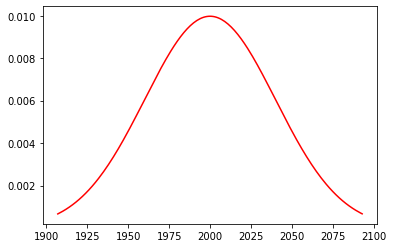

In [115]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

X = ss.norm(2000,40)
x = np.arange(X.ppf(0.01),X.ppf(0.99))

plt.plot(x,X.pdf(x),"r")
plt.show()

***NOTA: Estos modelos no son perfectos, pero son lo suficientemente flexibles para ser un buen punto de partida.***

# ***MUCHAS GRACIAS POR SU ATENCIÓN***

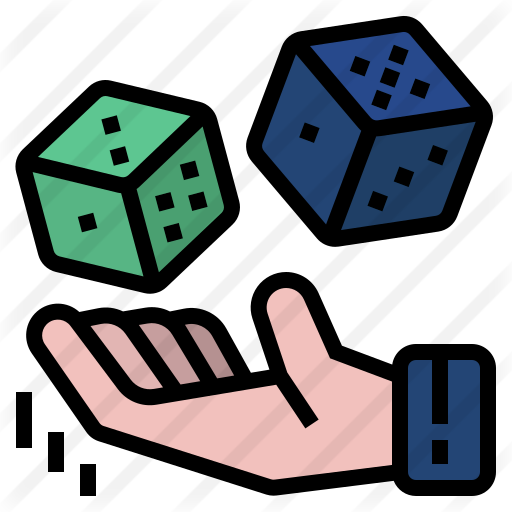